<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          

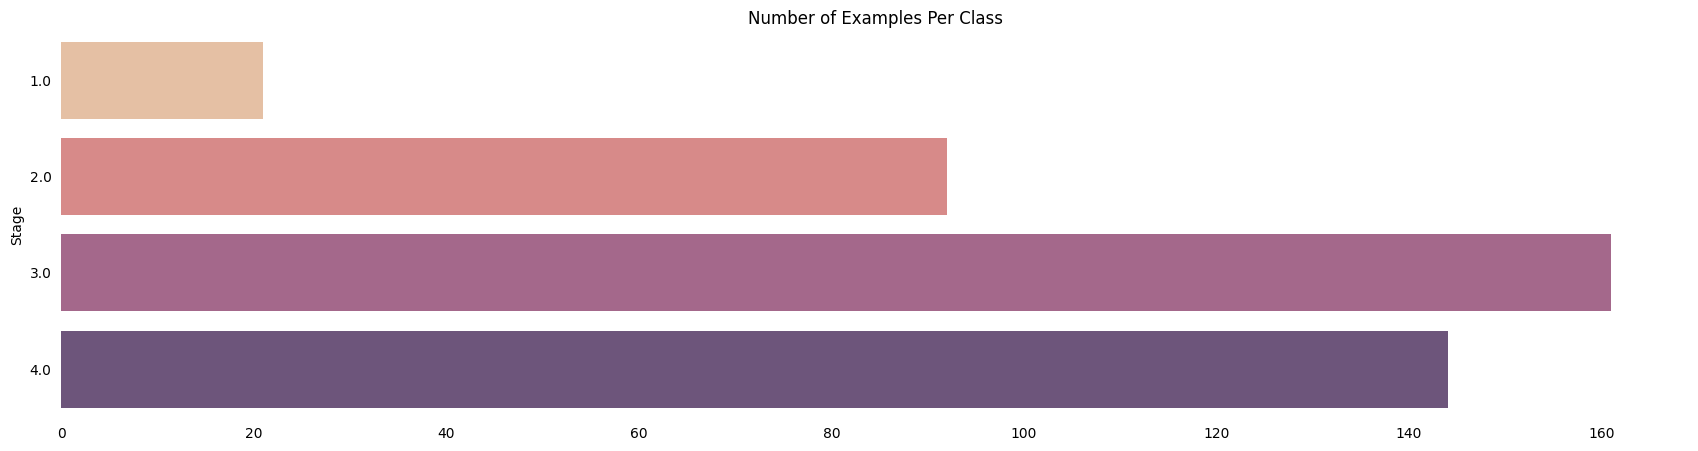

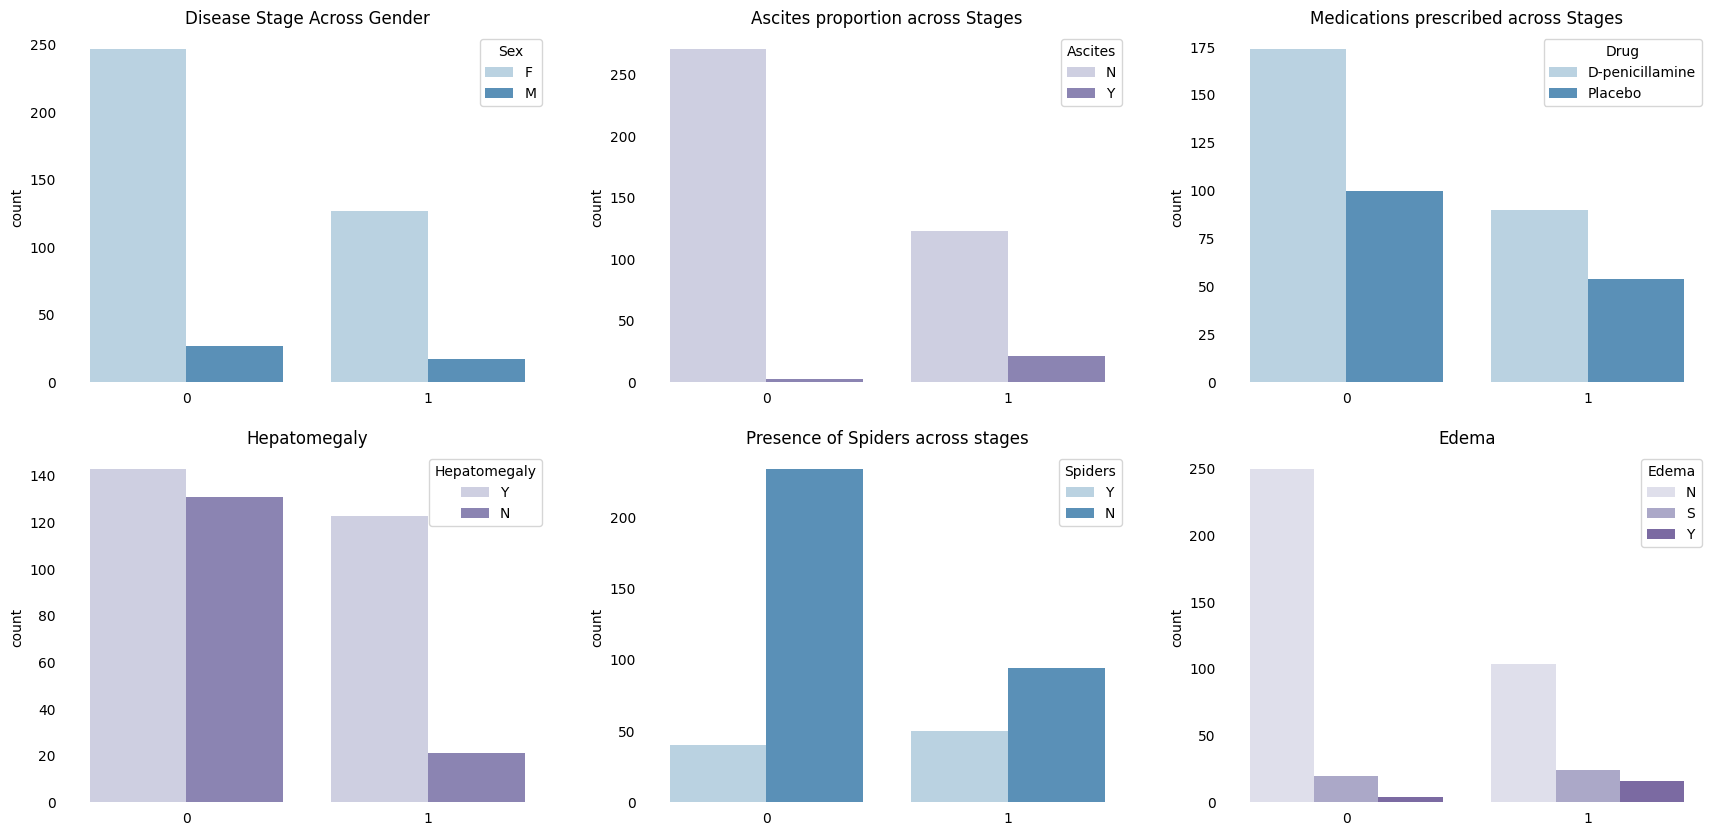

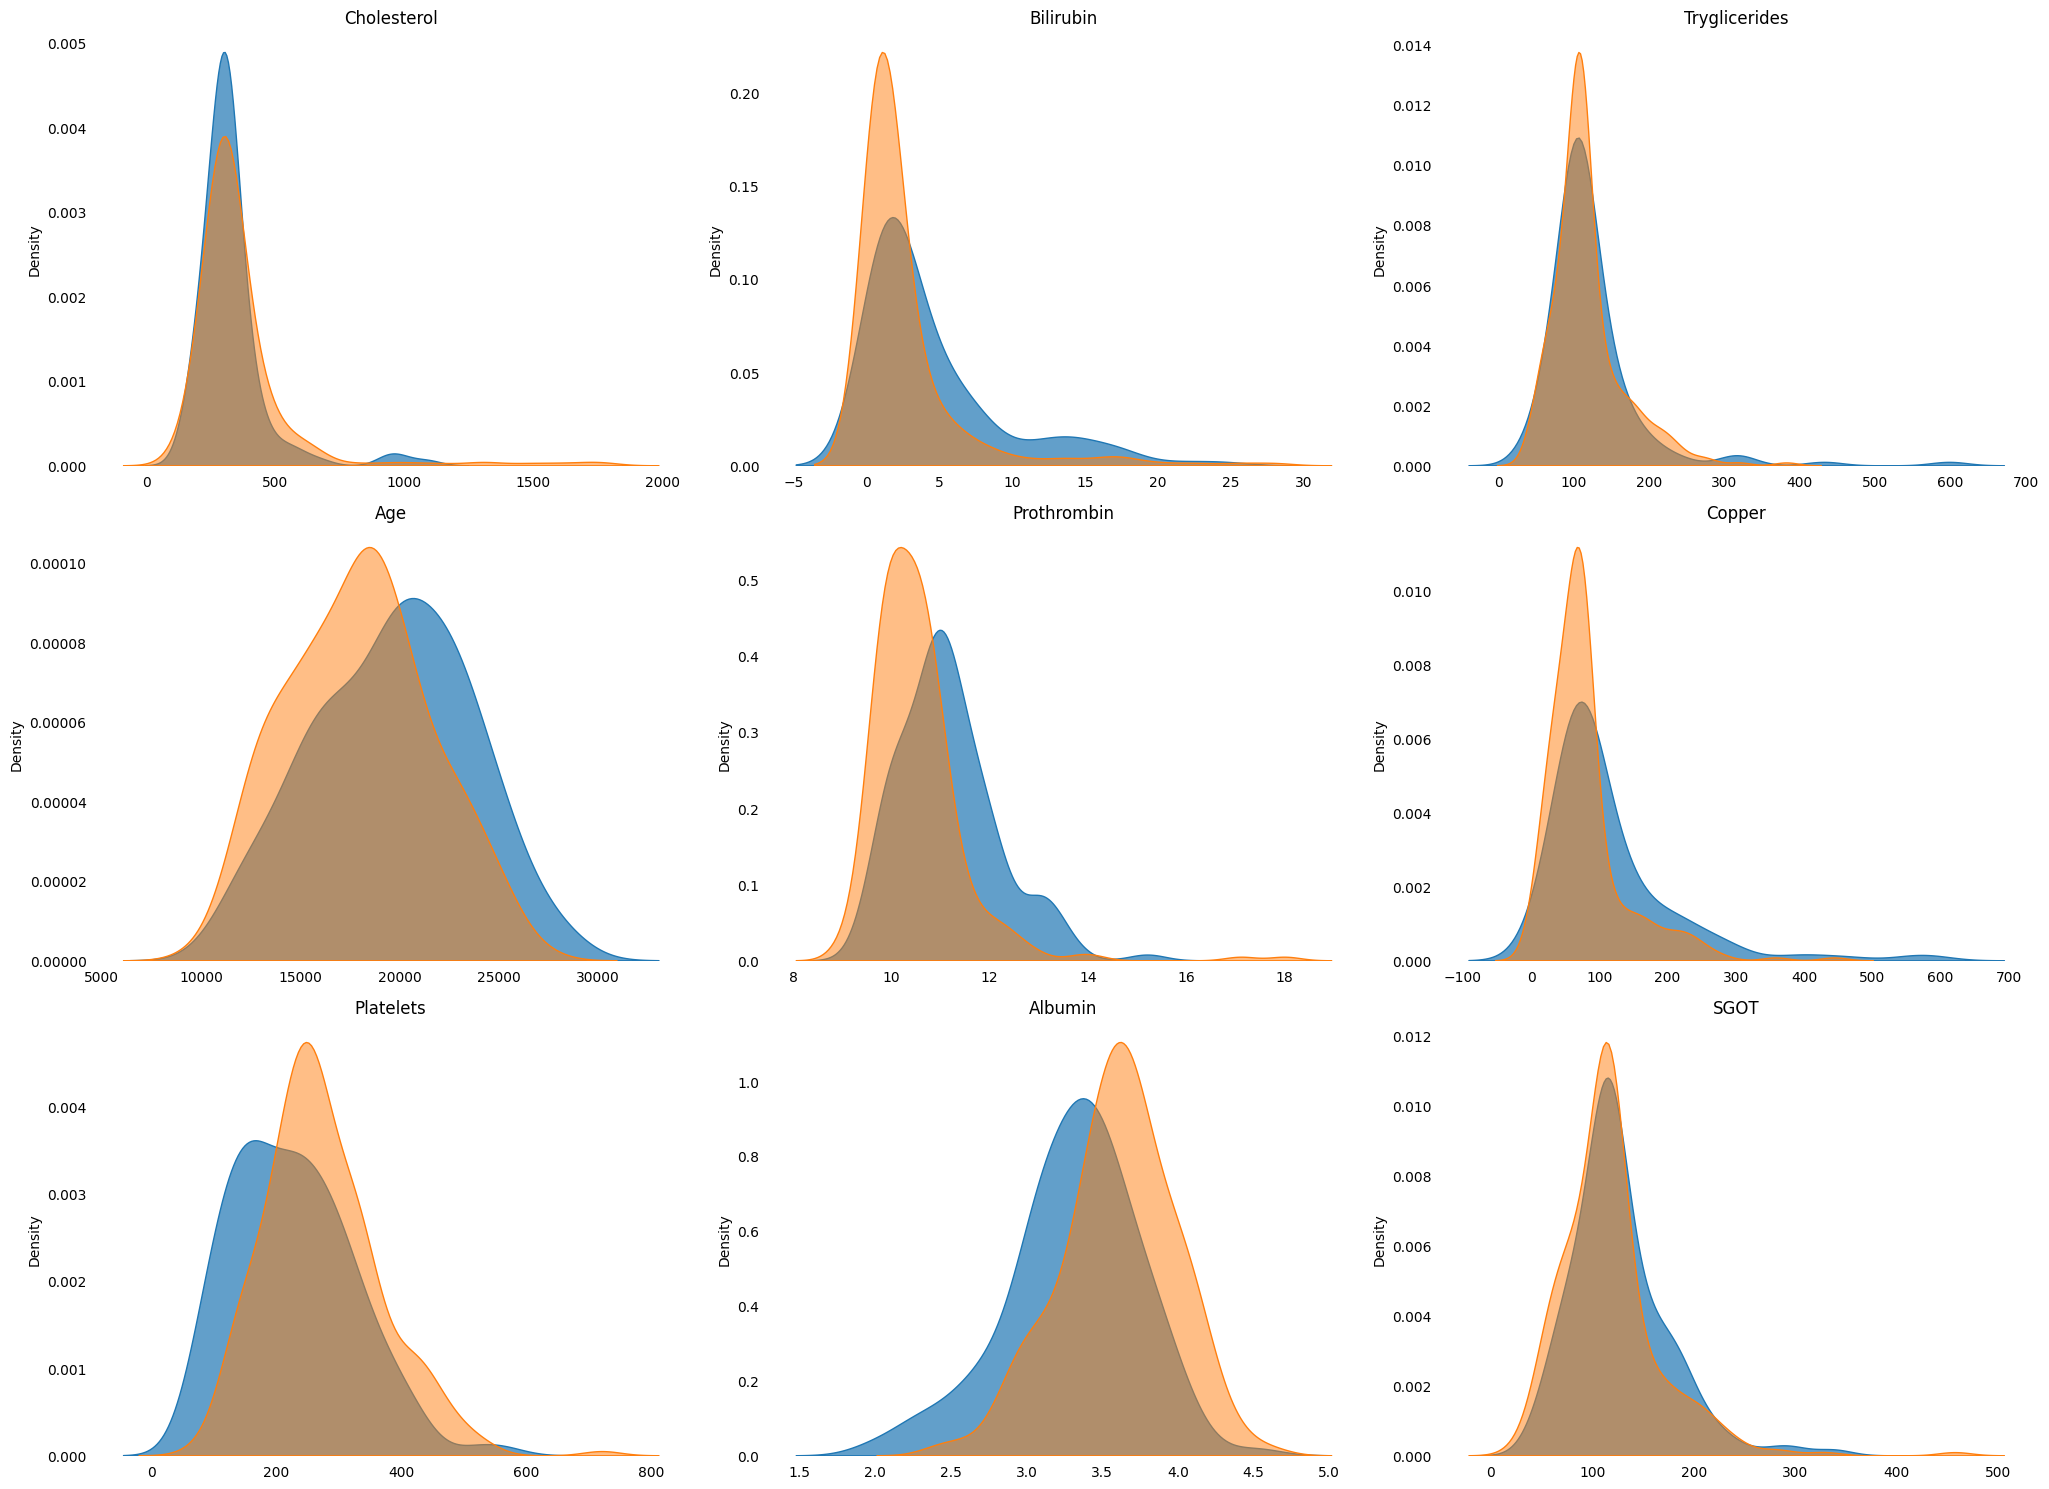

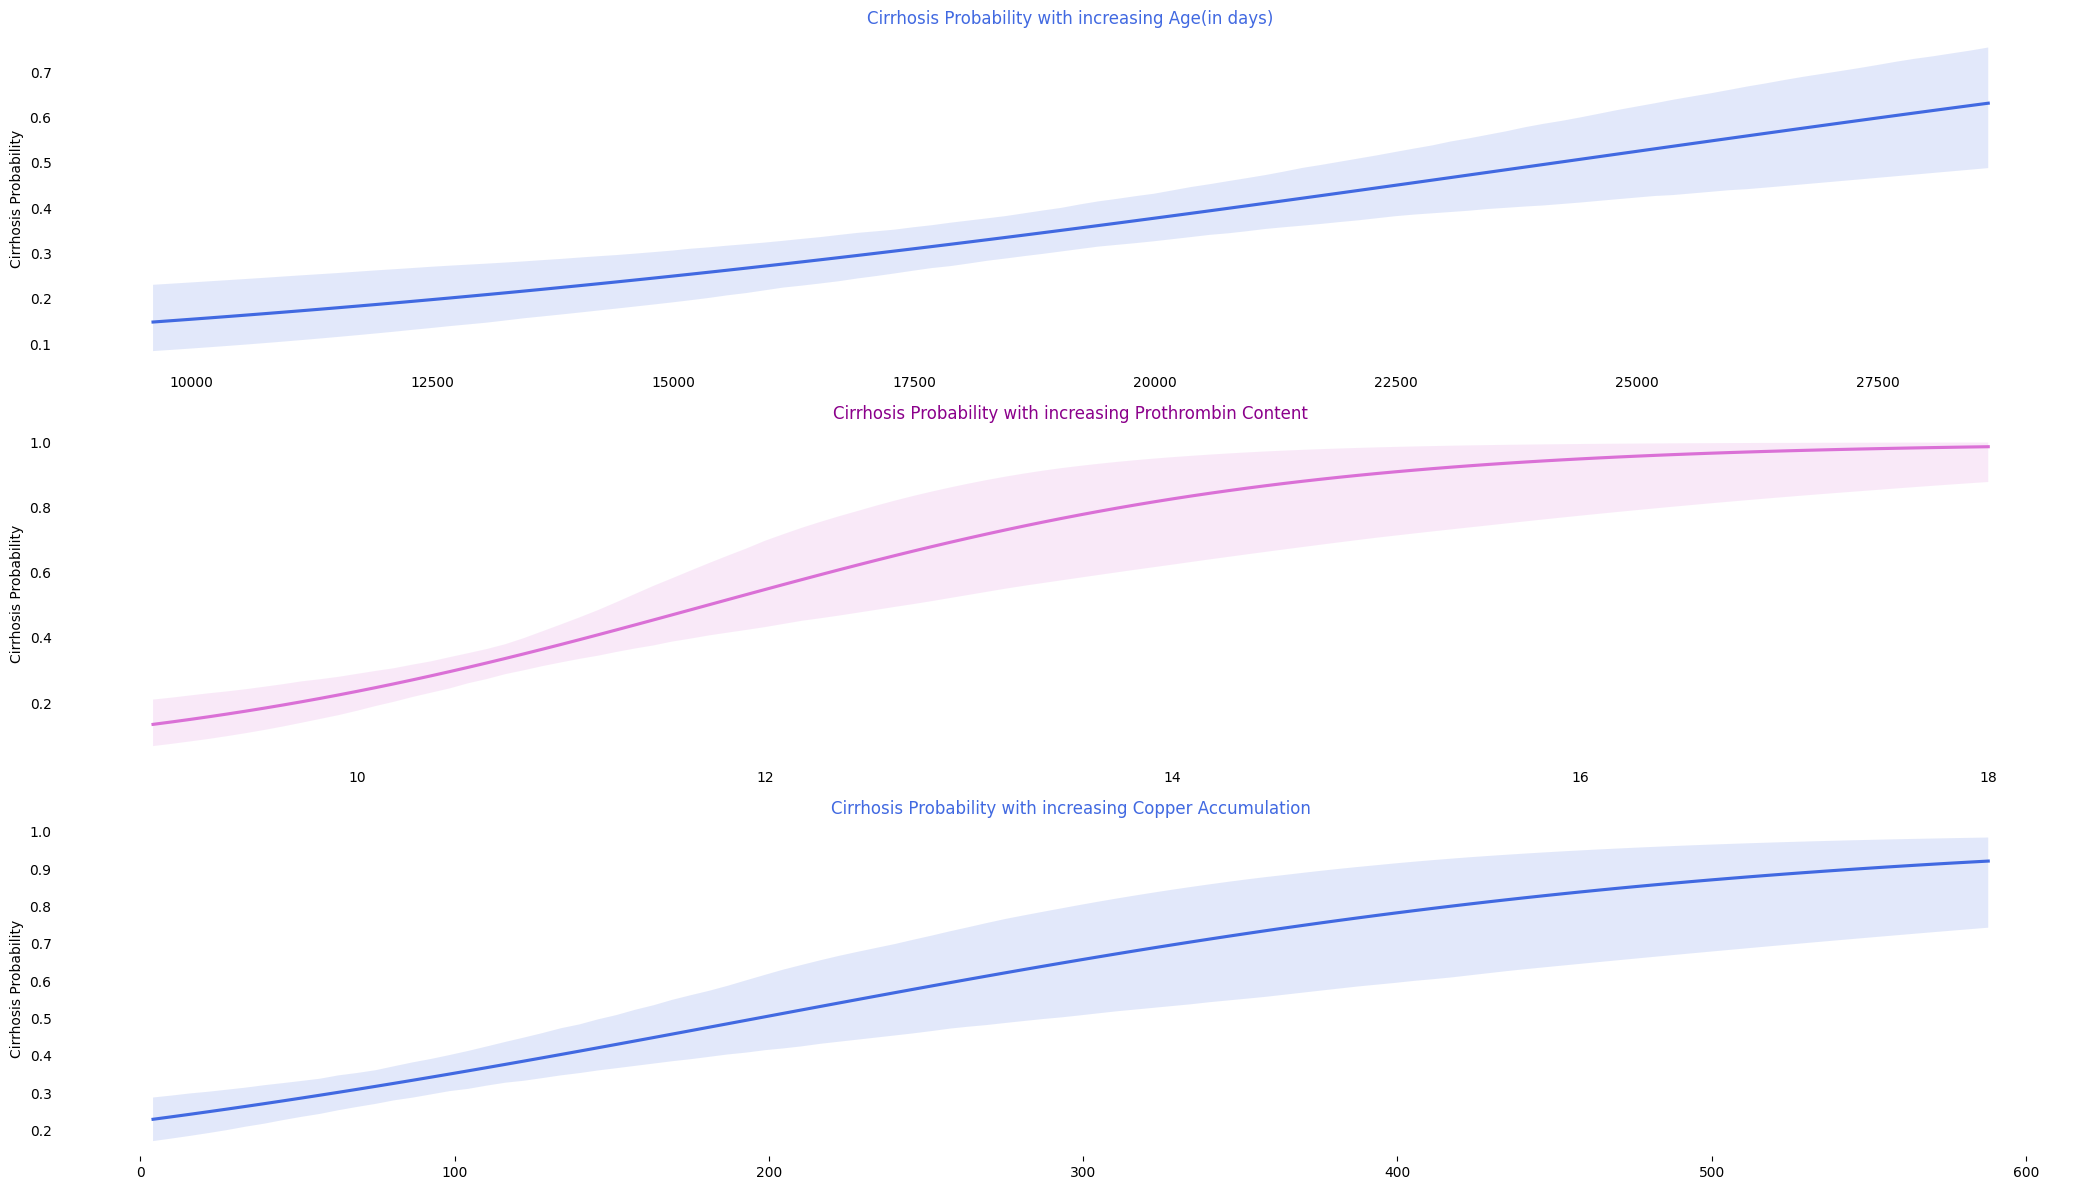

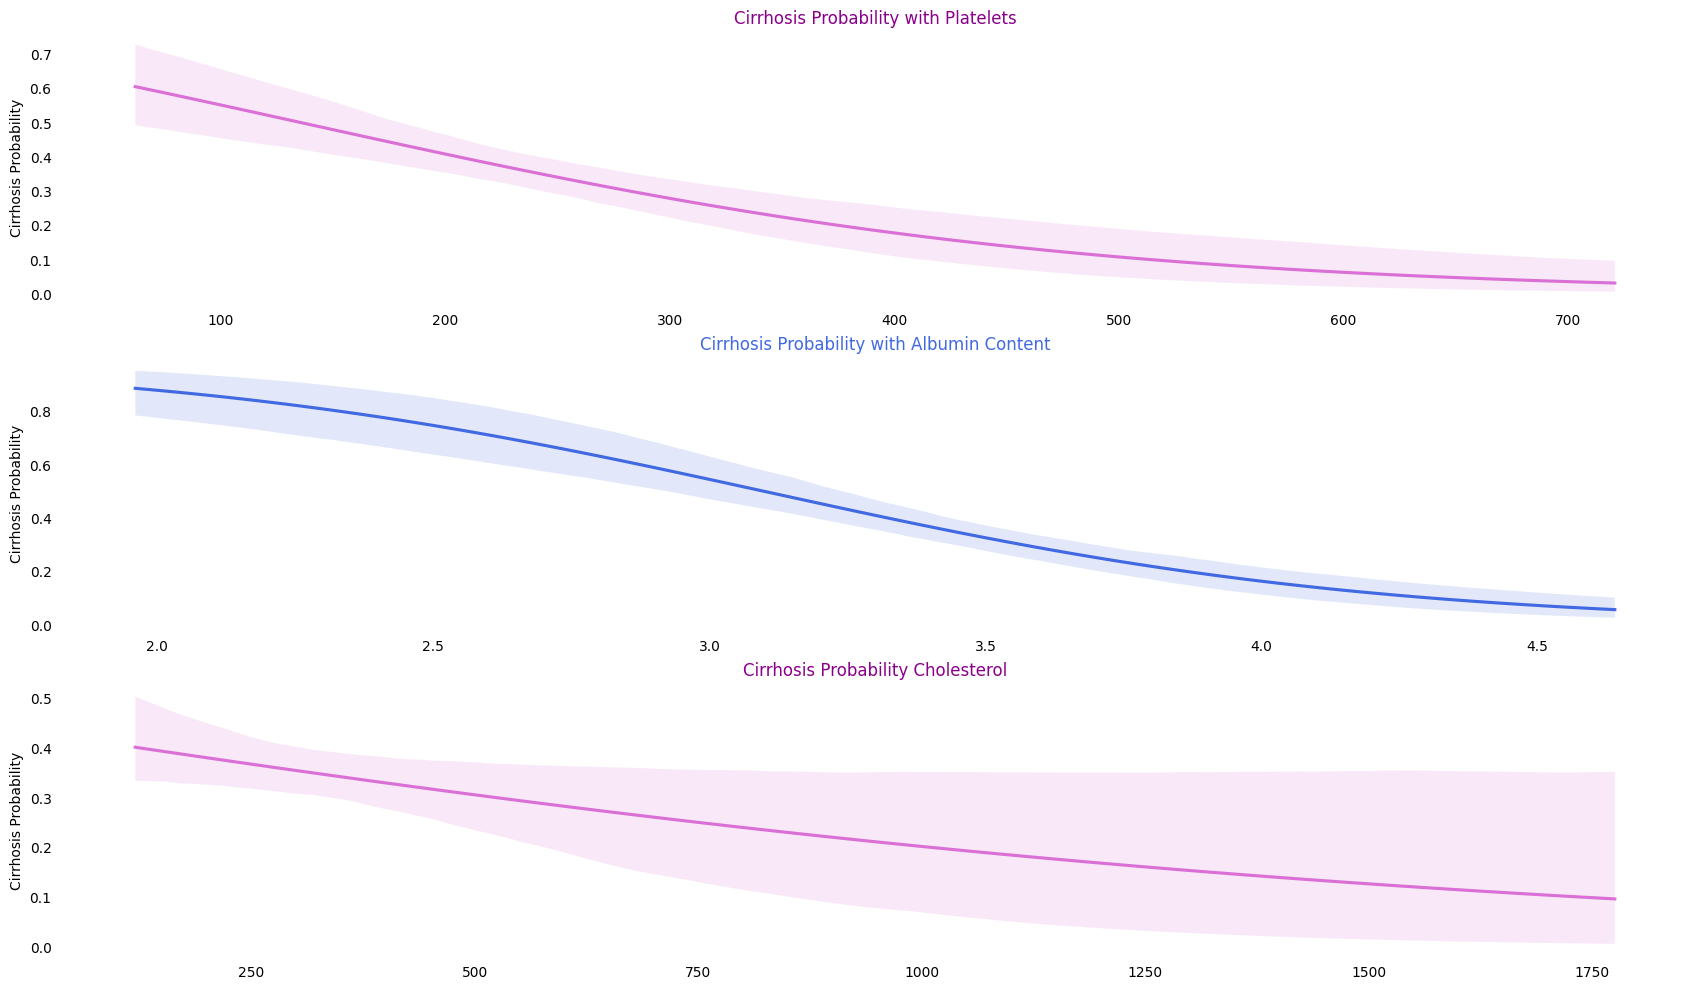

For Fold 1 the accuracy is 0.6904761904761905
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.6190476190476191
For Fold 4 the accuracy is 0.6666666666666666
For Fold 5 the accuracy is 0.8095238095238095
For Fold 6 the accuracy is 0.6666666666666666
For Fold 7 the accuracy is 0.6904761904761905
For Fold 8 the accuracy is 0.7380952380952381
For Fold 9 the accuracy is 0.7317073170731707
For Fold 10 the accuracy is 0.6341463414634146

Logestic Regression Mean Accuracy =  70.32520325203252 %
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.45      0.36      0.40        14

    accuracy                           0.63        41
   macro avg       0.58      0.57      0.57        41
weighted avg       0.62      0.63      0.62        41

AUC :  0.6507936507936508


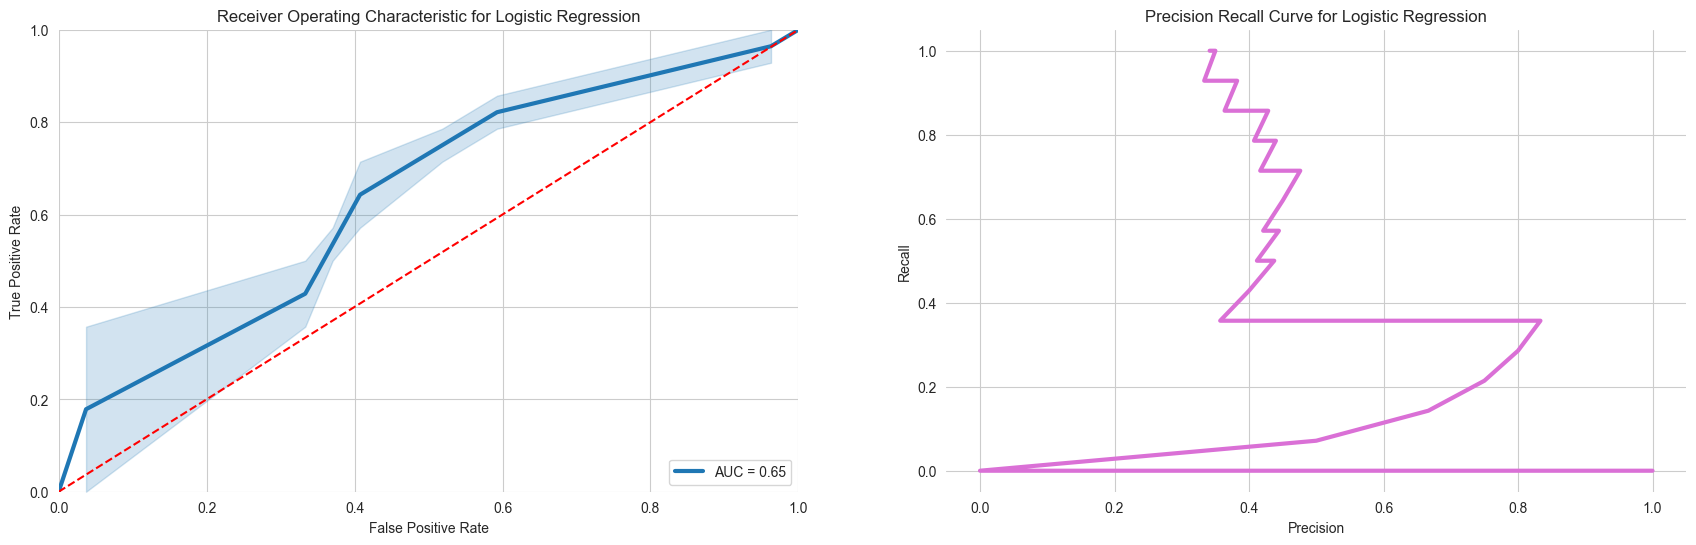

For Fold 1 the accuracy is 0.7619047619047619
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.7380952380952381
For Fold 4 the accuracy is 0.7619047619047619
For Fold 5 the accuracy is 0.8095238095238095
For Fold 6 the accuracy is 0.7380952380952381
For Fold 7 the accuracy is 0.7619047619047619
For Fold 8 the accuracy is 0.7857142857142857
For Fold 9 the accuracy is 0.7073170731707317
For Fold 10 the accuracy is 0.7560975609756098

XGboost model Mean Accuracy =  76.06271777003484 %
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.70      0.50      0.58        14

    accuracy                           0.76        41
   macro avg       0.74      0.69      0.71        41
weighted avg       0.75      0.76      0.74        41

AUC :  0.7433862433862434


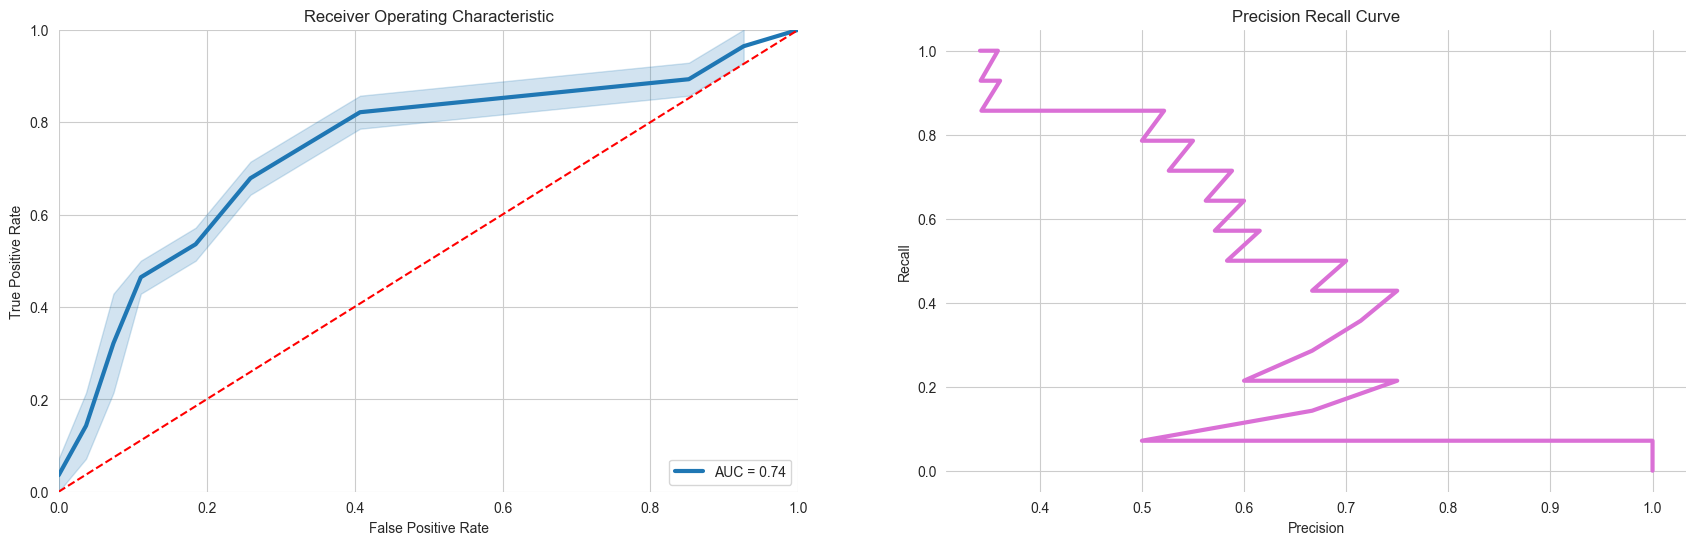

In [1]:
%run XGBoost.ipynb

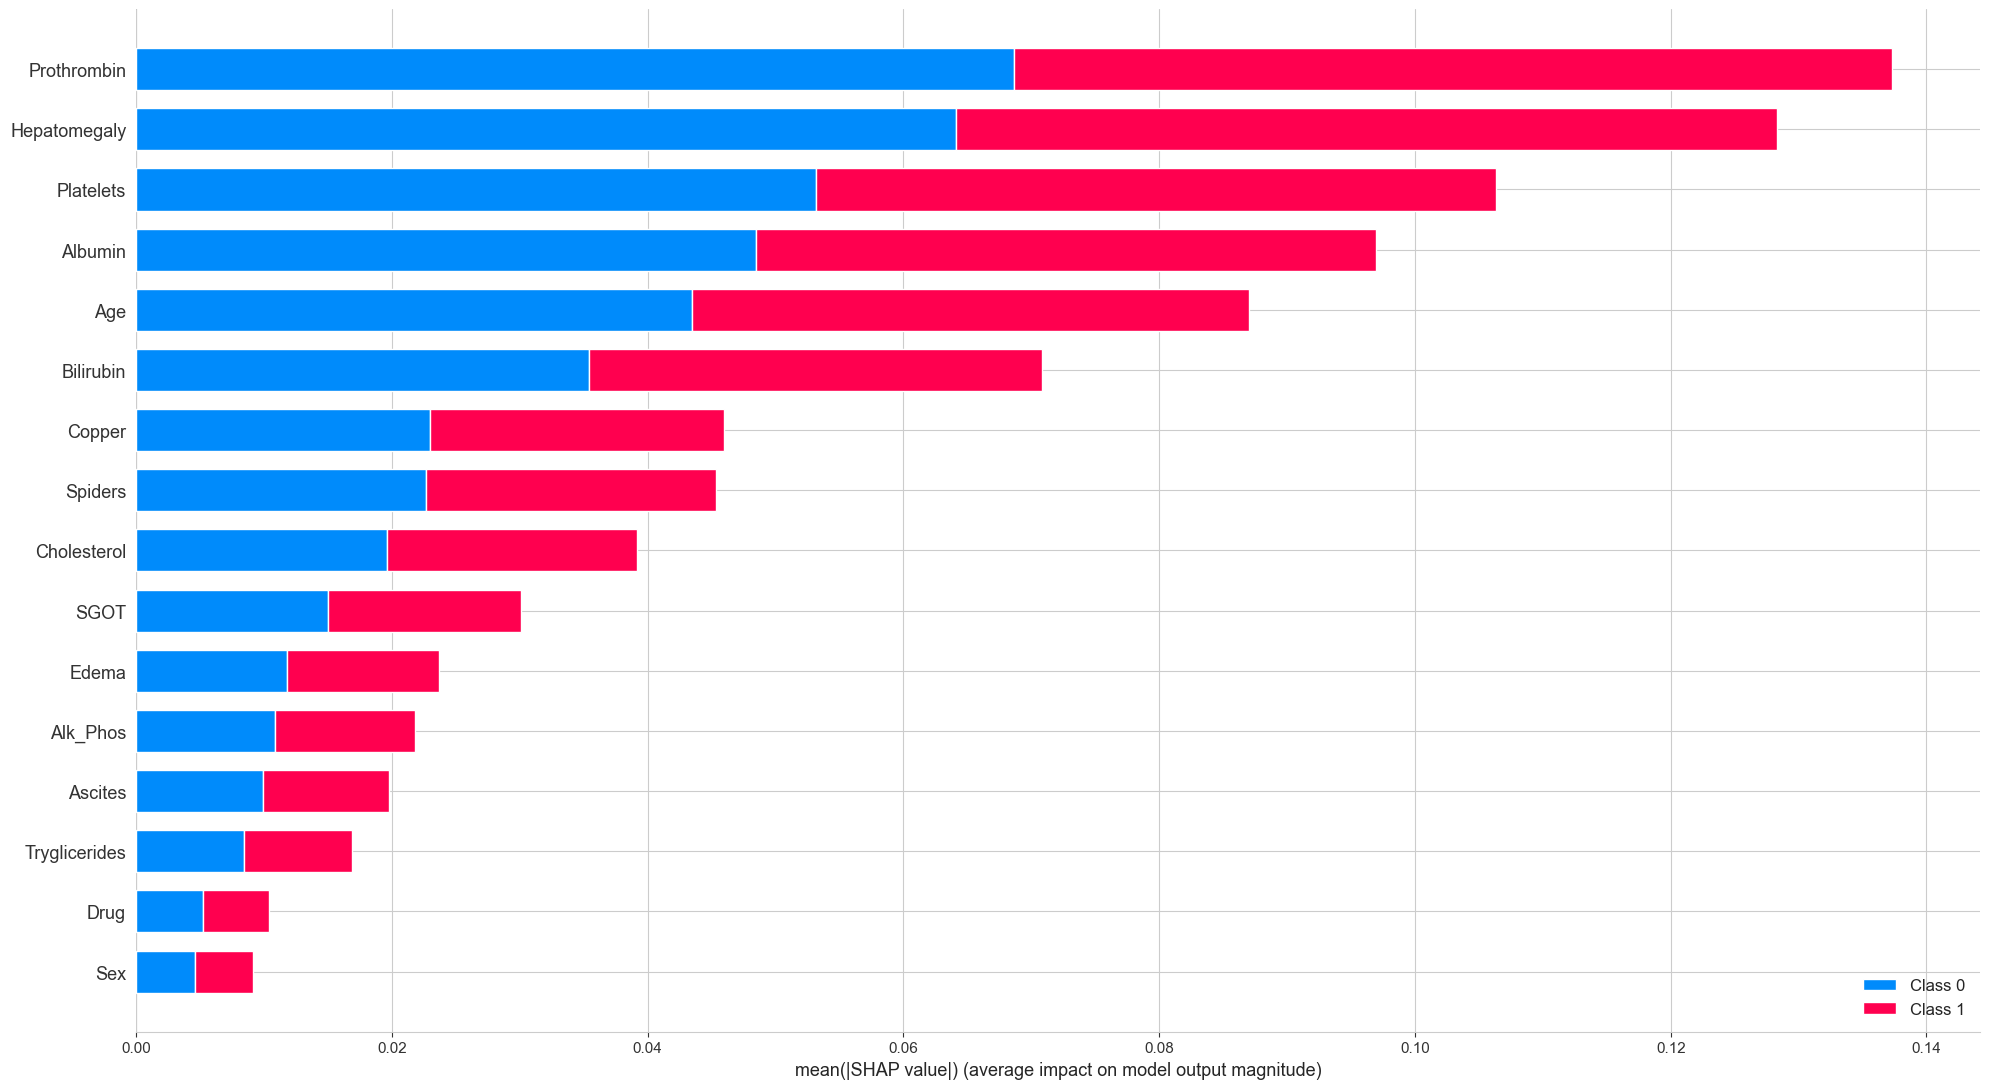

In [2]:
import shap
from sklearn.ensemble import RandomForestClassifier         # using random forest to explain for ease
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(train, y.iloc[train_index])

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(test)
shap.summary_plot(shap_values, train, plot_size=(20,11), alpha=0.2, plot_type='bar')

### The abve plot shows what features contribute highest towards predicting a positive class. Prothrombin, Albumin, Hepatomegaly are highly corelated with the disease prediction and features like Gender, Drug, Ascites have the least corelation
